In [7]:
import os

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import PIL.Image
from tqdm.notebook import tqdm, trange
import glob
import nltk
import base64
from IPython.display import Image as IImage
from IPython.display import display
import warnings
tqdm.pandas()

In [8]:
topics = {196: {'cross',
  'crossing',
  'crosswalk',
  'pedestrian',
  'signal',
  'stripe',
  'traffic'},
 412: {'arrest',
  'pedestrian',
  'perp',
  'pers',
  'walk',
  'walkability',
  'walkable'},
 172: {'car',
  'lane',
  'pedestrian',
  'road',
  'street',
  'traffic',
  'transportation',
  'vehicle'},
 363: {'assault',
  'bystander',
  'intervene',
  'intervention',
  'pedestrian',
  'stalk',
  'stalker',
  'victim',
  'witness'},
 198: {'car',
  'garage',
  'park',
  'parking',
  'parkjockey',
  'pedestrian',
  'tow',
  'vehicle'},
 114: {'athlete',
  'disability',
  'paralympic',
  'paralympics',
  'pedestrian',
  'sport',
  'sportspeople',
  'wheelchair'},
 419: {'avenue',
  'boulevard',
  'intersection',
  'manhattan',
  'pedestrian',
  'road',
  'street',
  'suffix'},
 294: {'drive',
  'fine',
  'licence',
  'offence',
  'pedestrian',
  'penalty',
  'reckless',
  'speed',
  'ticket',
  'traffic',
  'violation'},
 388: {'brownian',
  'diffusion',
  'distribution',
  'markov',
  'pedestrian',
  'percolation',
  'step',
  'stochastic',
  'walk',
  'wiener'},
 314: {'circle',
  'interchange',
  'intersection',
  'junction',
  'lane',
  'pedestrian',
  'road',
  'roundabout',
  'traffic'},
 98: {'cross',
  'direction',
  'lane',
  'marker',
  'parking',
  'pedestrian',
  'road',
  'sign',
  'signage',
  'traffic'},
 80: {'accident',
  'brake',
  'collision',
  'drive',
  'fatality',
  'momentum',
  'nhtsa',
  'pedestrian',
  'vehicle',
  'velocity'},
 134: {'avenue',
  'edmonton',
  'expressway',
  'freeway',
  'gardiner',
  'highway',
  'lane',
  'ontario',
  'pedestrian',
  'road',
  'toronto'},
 432: {'alice',
  'book',
  'fiction',
  'novel',
  'pedestrian',
  'poem',
  'poetry',
  'pulitzer',
  'walker'},
 394: {'alley',
  'boulevard',
  'bridleway',
  'bridleways',
  'footpath',
  'path',
  'pedestrian'},
 53: {'asphalt',
  'cement',
  'concrete',
  'gravel',
  'pave',
  'pavement',
  'pedestrian',
  'pothole',
  'road',
  'sand'},
 56: {'bus',
  'pedestrian',
  'streetcar',
  'subway',
  'train',
  'tram',
  'transit',
  'transportation',
  'trolley'},
 150: {'freeway',
  'highway',
  'intersection',
  'lane',
  'pedestrian',
  'ramp',
  'road',
  'traffic'},
 278: {'deck',
  'park',
  'pedestrian',
  'promenade',
  'promenadef',
  'promenaden',
  'promener',
  'walk'},
 -1: {'american',
  'century',
  'example',
  'film',
  'her',
  'pedestrian',
  'public',
  'state',
  'street',
  'water'},
 43: {'black',
  'civil',
  'negro',
  'pedestrian',
  'protest',
  'protester',
  'race',
  'racial',
  'segregation',
  'white'},
 265: {'baby',
  'carriage',
  'child',
  'diaper',
  'harness',
  'hatch',
  'infant',
  'pedestrian',
  'stroller'},
 345: {'barrier',
  'bumper',
  'guardrail',
  'hazard',
  'pedestrian',
  'protect',
  'rail',
  'safety'},
 378: {'architect',
  'architecture',
  'building',
  'chicago',
  'city',
  'frederick',
  'park',
  'pedestrian'},
 11: {'freeway',
  'highway',
  'intersection',
  'interstate',
  'lane',
  'pedestrian',
  'road',
  'route',
  'terminus',
  'turnpike'},
 331: {'byway',
  'highway',
  'navajo',
  'parkway',
  'pedestrian',
  'road',
  'roadway',
  'route',
  'scenic'},
 202: {'bottleneck',
  'congest',
  'congestion',
  'delay',
  'downstream',
  'pedestrian',
  'road',
  'speed',
  'traffic',
  'vehicle'},
 169: {'apartment',
  'condominium',
  'home',
  'homeless',
  'homelessness',
  'house',
  'household',
  'housing',
  'pedestrian',
  'shelter'},
 327: {'bartholdi',
  'lazarus',
  'liberty',
  'monument',
  'pedestal',
  'pedestrian',
  'sculptor',
  'sculpture',
  'statue',
  'torch'},
 309: {'adelaide',
  'carriageworks',
  'close',
  'geelong',
  'line',
  'melbourne',
  'pedestrian',
  'rail',
  'railway',
  'train'},
 68: {'axle',
  'carriage',
  'chariot',
  'passenger',
  'pedestrian',
  'vehicle',
  'wagon',
  'wheel'},
 216: {'carriageway',
  'lane',
  'm1',
  'm11',
  'm25',
  'm32',
  'motorway',
  'pedestrian',
  'road',
  'roundabout'},
 40: {'arrest',
  'constable',
  'constabulary',
  'enforcement',
  'officer',
  'patrol',
  'pedestrian',
  'police'},
 99: {'building',
  'concrete',
  'construction',
  'insulation',
  'masonry',
  'pedestrian',
  'roof',
  'structure',
  'wall'},
 426: {'80211p',
  'cv2x',
  'pedestrian',
  'unlock',
  'v2v',
  'v2x',
  'vanet',
  'vanets',
  'vehicle',
  'vehicular'},
 344: {'adriatic',
  'censor',
  'corniche',
  'itinerary',
  'pave',
  'pedestrian',
  'road',
  'roman',
  'rome'},
 47: {'avenue',
  'bmt',
  'broadway',
  'broadwayseventh',
  'brooklyn',
  'manhattan',
  'pedestrian',
  'station',
  'subway',
  'train'},
 8: {'bicycle',
  'bike',
  'cycle',
  'cycling',
  'cyclist',
  'pedestrian',
  'rid',
  'rider',
  'tire'},
 416: {'descriptor',
  'detection',
  'detector',
  'keypoints',
  'ocr',
  'pedestrian',
  'pixel',
  'recognition',
  'sift',
  'vision'},
 112: {'bus',
  'congestion',
  'freight',
  'passenger',
  'pedestrian',
  'route',
  'traffic',
  'transit',
  'transport',
  'transportation'},
 137: {'expressway',
  'freeway',
  'highway',
  'lane',
  'motorway',
  'pedestrian',
  'road'},
 441: {'actor',
  'character',
  'drama',
  'hamlet',
  'novel',
  'pedestrian',
  'protagonist',
  'romeo',
  'shakespeare'},
 192: {'ataxia',
  'cerebellar',
  'cerebellum',
  'cerebral',
  'diplegia',
  'disorder',
  'gait',
  'palsy',
  'pedestrian',
  'symptom',
  'syndrome'},
 20: {'ankle', 'dance', 'dancer', 'foot', 'leg', 'pedestrian', 'toe'},
 296: {'area',
  'monument',
  'park',
  'pedestrian',
  'playground',
  'recreation',
  'scenic',
  'wilderness',
  'yellowstone'},
 144: {'',
  'address',
  'comma',
  'image',
  'more',
  'pedestrian',
  'person',
  'separate',
  'share',
  'video'},
 12: {'appalachian',
  'footpath',
  'hike',
  'hiker',
  'mountain',
  'path',
  'pedestrian',
  'trail'},
 224: {'bus',
  'depot',
  'fleet',
  'goahead',
  'pedestrian',
  'sb',
  'singapore',
  'smrt',
  'tram',
  'transit'},
 250: {'driver',
  'graphic',
  'kernel',
  'kernelmode',
  'kmdf',
  'linux',
  'pedestrian',
  'printer',
  'umdf',
  'usb'},
 376: {'bear',
  'cartoon',
  'charlie',
  'disney',
  'lucy',
  'mickey',
  'peanut',
  'pedestrian',
  'snoopy',
  'trolley'}}

In [9]:
for el in topics:
    print(el, topics[el])

196 {'crosswalk', 'cross', 'traffic', 'stripe', 'signal', 'pedestrian', 'crossing'}
412 {'pers', 'walkability', 'perp', 'walkable', 'arrest', 'pedestrian', 'walk'}
172 {'transportation', 'traffic', 'vehicle', 'lane', 'street', 'car', 'pedestrian', 'road'}
363 {'bystander', 'stalker', 'victim', 'intervene', 'intervention', 'witness', 'assault', 'stalk', 'pedestrian'}
198 {'garage', 'tow', 'park', 'parkjockey', 'car', 'parking', 'pedestrian', 'vehicle'}
114 {'disability', 'athlete', 'sport', 'paralympics', 'paralympic', 'wheelchair', 'sportspeople', 'pedestrian'}
419 {'boulevard', 'manhattan', 'intersection', 'suffix', 'street', 'avenue', 'pedestrian', 'road'}
294 {'drive', 'traffic', 'speed', 'offence', 'ticket', 'fine', 'licence', 'violation', 'reckless', 'pedestrian', 'penalty'}
388 {'distribution', 'diffusion', 'step', 'walk', 'percolation', 'stochastic', 'brownian', 'pedestrian', 'markov', 'wiener'}
314 {'interchange', 'traffic', 'lane', 'junction', 'intersection', 'circle', 'rounda

### change d_path to your local address

In [10]:
d_path = '/raid/AISSEL/htest/datasets/ped_ftest'
df_after = pd.read_pickle(f'{d_path}/df_test_ped.pk')
df_after

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics
0,167,167,Car on rural road vector Stock Photo,68,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.376758,0.212455,a
1,184,184,Bus Only Lane Rendering Kuhio and Walina,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.392783,0.160691,a
2,187,187,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a
3,192,192,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a
4,209,209,Pedestrian Connections Congestion Strategy,112,,/9j/7gAOQWRvYmUAZAAAAAAA/9sAQwAIBgYHBgUIBwcHCQ...,0.612697,0.493012,a
...,...,...,...,...,...,...,...,...,...
645,1228,1228,Westown Commons picnic shelter front view,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.395052,0.217862,o
646,1241,1241,Humboldt Alexander Von Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.415312,0.211162,o
647,1259,1259,photo of trees and the fenceline at Mason Hill...,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.446961,0.234170,o
648,1296,1296,Hogback Ridge Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.579372,0.235827,o


In [11]:
df_before = pd.read_pickle(f'{d_path}/df_test_ped.pk')
df_before

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics
0,167,167,Car on rural road vector Stock Photo,68,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.376758,0.212455,a
1,184,184,Bus Only Lane Rendering Kuhio and Walina,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.392783,0.160691,a
2,187,187,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a
3,192,192,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a
4,209,209,Pedestrian Connections Congestion Strategy,112,,/9j/7gAOQWRvYmUAZAAAAAAA/9sAQwAIBgYHBgUIBwcHCQ...,0.612697,0.493012,a
...,...,...,...,...,...,...,...,...,...
645,1228,1228,Westown Commons picnic shelter front view,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.395052,0.217862,o
646,1241,1241,Humboldt Alexander Von Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.415312,0.211162,o
647,1259,1259,photo of trees and the fenceline at Mason Hill...,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.446961,0.234170,o
648,1296,1296,Hogback Ridge Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.579372,0.235827,o


In [12]:
def get_image(idx ,df):
    image_64_decode = base64.b64decode(df.at[idx,'image']) 
    image_result = open('deer_decode.jpg', 'wb')
    image_result.write(image_64_decode)

In [13]:
# cols = ['uniq_id', 'image_id', 'caption', 'labels', 'image']
# f_path = '/raid/AISSEL/htest/datasets/caption_data/caption_stage1_train.tsv'
# df_1 = pd.read_csv(f'{f_path}', sep='\t', names=cols)

In [14]:
def get_cap(idx):
    image_64_decode = base64.b64decode(df_before.at[idx,'image']) 
    image_result = open('deer_decode.jpg', 'wb')
    image_result.write(image_64_decode)
    bf = df_before.at[idx,'caption']
    af = df_before.at[idx,'caption']
    return bf, af

In [15]:
bf, af = get_cap(100)

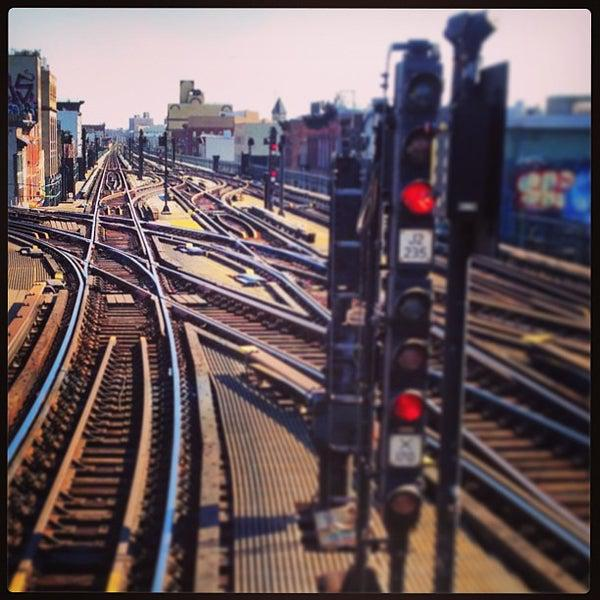

In [16]:
IImage(filename='deer_decode.jpg', width = 300, height = 200) 

## change these variable to your range
    1. htest: 0 to 218
    2. Fatemeh: 218 to 434
    3. Darin: 434 to 650


In [17]:
s_ind = 0
e_ind = 10
data_length = 650

In [47]:
d = [None] * 650

In [48]:
d[0] =  {'passenger': 0, 'wheel': 1, 'vehicle':1, 'wagon':0, 'axle':0, 
         'carriage': 0, 'chariot':0, 'pedestrian':0 }
d[1] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':0, 'passenger':0, 'transit':1, 'bus':1, 'route':1, 'pedestrian':1}
d[2] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':0, 'passenger':0, 'transit':1, 'bus':1, 'route':1, 'pedestrian':1}
d[3] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':0, 'passenger':0, 'transit':1, 'bus':1, 'route':1, 'pedestrian':1}
d[4] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':1, 'passenger':0, 'transit':1, 'bus':1, 'route':1, 'pedestrian':1}
d[5] = {'freight':0, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':0, 'passenger':0, 'transit':1, 'bus':0, 'route':1, 'pedestrian':0}
d[6] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':1, 'passenger':0, 'transit':1, 'bus':0, 'route':1, 'pedestrian':0}
d[7] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':0, 'passenger':1, 'transit':1, 'bus':0, 'route':1, 'pedestrian':1}
d[8] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':1, 'passenger':1, 'transit':1, 'bus':0, 'route':1, 'pedestrian':1}
d[9] = {'freight':1, 'transportation':1, 'traffic':1, 'transport':1, 
        'congestion':1, 'passenger':1, 'transit':1, 'bus':1, 'route':1, 'pedestrian':1}

In [49]:
d[10] = {'freight':1, 'transportation':1, 'traffic':0, 'transport':1, 
        'congestion':0, 'passenger':1, 'transit':1, 'bus':1, 'route':0, 'pedestrian':1}
d[11] = {'freight':1, 'transportation':1, 'traffic':0, 'transport':1, 
        'congestion':0, 'passenger':0, 'transit':1, 'bus':1, 'route':0, 'pedestrian':0}
d[12] = {'pedestrian':1, 'tram':1, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':1}
d[13] = {'pedestrian':1, 'tram':1, 'transportation':1, 'train':1, 'trolley':1, 
         'subway':1, 'transit':1, 'bus':1, 'streetcar':1}
d[14] = {'pedestrian':1, 'tram':1, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[15] = {'pedestrian':1, 'tram':1, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[16] = {'pedestrian':0, 'tram':0, 'transportation':1, 'train':0, 'trolley':1, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[17] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':1, 
         'subway':0, 'transit':1, 'bus':1, 'streetcar':1}
d[18] = {'pedestrian':1, 'tram':1, 'transportation':1, 'train':1, 'trolley':1, 
         'subway':0, 'transit':1, 'bus':1, 'streetcar':1}
d[19] = {'pedestrian':0, 'tram':0, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':1}

In [50]:
d[20] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':1}
d[21] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[22] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':1}
d[23] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':1}
d[24] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':1, 
         'subway':0, 'transit':1, 'bus':1, 'streetcar':0}
d[25] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':1}
d[26] = {'pedestrian':0, 'tram':1, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[27] = {'pedestrian':0, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[28] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[29] = {'pedestrian':1, 'tram':1, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}

In [51]:
d[30] = {'pedestrian':0, 'tram':0, 'transportation':0, 'train':0, 'trolley':0, 
         'subway':0, 'transit':0, 'bus':0, 'streetcar':0}
d[31] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':0, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[32] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[33] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[34] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[35] = {'pedestrian':0, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[36] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[37] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}
d[38] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':0, 'transit':1, 'bus':0, 'streetcar':0}
d[39] = {'pedestrian':1, 'tram':0, 'transportation':1, 'train':1, 'trolley':0, 
         'subway':1, 'transit':1, 'bus':0, 'streetcar':0}

In [52]:
d[40] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[41] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':0, 'transit':1, 'bus':0, 
         'singapore':0, 'depot':0, 'pedestrian':1, 'sb':0}
d[42] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':0, 'sb':0}
d[43] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':0, 'sb':0}
d[44] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':0, 'sb':0}
d[45] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[46] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[47] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':1, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[48] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[49] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':1, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}

In [53]:
d[50] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[51] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[52] = {'tram':0, 'goahead':0, 'fleet':0, 'smrt':1, 'transit':1, 'bus':0, 
         'singapore':1, 'depot':0, 'pedestrian':1, 'sb':0}
d[53] = {'close':0, 'train':0, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[54] = {'close':0, 'train':0, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[55] = {'close':0, 'train':0, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[56] = {'close':0, 'train':0, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[57] = {'close':0, 'train':0, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[58] = {'close':0, 'train':0, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[59] = {'close':0, 'train':0, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':1, 'melbourne':0}

In [54]:
d[60] = {'close':0, 'train':1, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[61] = {'close':0, 'train':0, 'line':0, 'carriageworks':1, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[62] = {'close':0, 'train':1, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[63] = {'close':0, 'train':1, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[64] = {'close':0, 'train':0, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[65] = {'close':0, 'train':0, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[66] = {'close':0, 'train':0, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[67] = {'close':0, 'train':1, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':1, 'melbourne':0}
d[68] = {'close':0, 'train':1, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[69] = {'close':0, 'train':1, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':0, 'melbourne':0}

In [55]:
d[70] = {'close':0, 'train':1, 'line':1, 'carriageworks':0, 'geelong':0, 
         'rail':1, 'railway':1, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[71] = {'close':0, 'train':1, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[72] = {'close':0, 'train':1, 'line':0, 'carriageworks':0, 'geelong':0, 
         'rail':0, 'railway':0, 'adelaide':0, 'pedestrian':0, 'melbourne':0}
d[73] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':1, 'pedestrian':1, 'road':1}
d[74] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':0, 'pedestrian':1, 'road':0}
d[75] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':1, 'pedestrian':0, 'road':1}
d[76] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':0, 'pedestrian':0, 'road':1}
d[77] = {'roman':1, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':1, 'rome':1, 'pave':1, 'pedestrian':1, 'road':1}
d[78] = {'roman':1, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':1, 'rome':1, 'pave':1, 'pedestrian':1, 'road':1}
d[79] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':1, 'pedestrian':1, 'road':1}

In [56]:
d[80] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':1, 'pedestrian':1, 'road':1}
d[81] = {'roman':0, 'corniche':0, 'censor':0, 'itinerary':0, 
         'adriatic':0, 'rome':0, 'pave':0, 'pedestrian':1, 'road':1}
d[82] = {'brooklyn':0, 'train':1, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':0, 'broadwayseventh':0}
d[83] = {'brooklyn':0, 'train':1, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':0, 'pedestrian':1, 'broadwayseventh':0}
d[84] = {'brooklyn':0, 'train':1, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':0, 'pedestrian':0, 'broadwayseventh':0}
d[85] = {'brooklyn':1, 'train':0, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':0, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[86] = {'brooklyn':0, 'train':1, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':0, 'pedestrian':1, 'broadwayseventh':0}
d[87] = {'brooklyn':0, 'train':0, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':0, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[88] = {'brooklyn':0, 'train':0, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':0, 'avenue':0, 'pedestrian':1, 'broadwayseventh':0}
d[89] = {'brooklyn':0, 'train':0, 'station':0, 'bmt':0, 'manhattan':0, 
         'broadway':1, 'subway':1, 'avenue':0, 'pedestrian':1, 'broadwayseventh':1}

In [57]:
d[90] = {'brooklyn':1, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':1, 'subway':1, 'avenue':0, 'pedestrian':1, 'broadwayseventh':0}
d[91] = {'brooklyn':1, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':1, 'subway':1, 'avenue':0, 'pedestrian':1, 'broadwayseventh':0}
d[92] = {'brooklyn':1, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':1, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[93] = {'brooklyn':1, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':1, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[94] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':1, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[95] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':1, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[96] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':0, 'broadwayseventh':0}
d[97] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':0, 'broadwayseventh':0}
d[98] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[99] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}

In [58]:
d[100] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':0, 'broadwayseventh':0}
d[101] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[102] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[103] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[104] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':0, 'broadwayseventh':0}
d[105] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[106] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[107] = {'brooklyn':0, 'train':1, 'station':1, 'bmt':0, 'manhattan':0, 
         'broadway':0, 'subway':1, 'avenue':1, 'pedestrian':1, 'broadwayseventh':0}
d[108] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[109] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}

In [59]:
d[110] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[111] = {'street':1, 'example':0, 'water':1, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[112] = {'street':0, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[113] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[114] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[115] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[116] = {'street':1, 'example':0, 'water':0, 'century':1, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[117] = {'street':1, 'example':0, 'water':1, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':0}
d[118] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[119] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':1, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}

In [60]:
d[120] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[121] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[122] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[123] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[124] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[125] = {'street':0, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':1, 'public':0, 'state':0, 'pedestrian':0}
d[126] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[127] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[128] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}
d[129] = {'street':1, 'example':0, 'water':0, 'century':0, 'her':0, 
          'american':1, 'film':0, 'public':1, 'state':0, 'pedestrian':1}

In [61]:
d[130] = {'concrete':1, 'cement':0, 'pothole':0, 'pavement':0, 'asphalt':0, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}
d[131] = {'concrete':1, 'cement':0, 'pothole':0, 'pavement':0, 'asphalt':1, 
          'pave':0, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[132] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':0, 'asphalt':1, 
          'pave':0, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[133] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':0, 'asphalt':1, 
          'pave':0, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[134] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[135] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}
d[136] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}
d[137] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[138] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}
d[139] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':0, 'asphalt':1, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}

In [62]:
d[140] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[141] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[142] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[143] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[144] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}
d[145] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}
d[146] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[147] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}
d[148] = {'concrete':1, 'cement':1, 'pothole':1, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[149] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}

In [63]:
d[150] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':0, 'gravel':0}
d[151] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':1, 'asphalt':0, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':0, 'gravel':0}
d[152] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':0, 'asphalt':0, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}
d[153] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':0, 'asphalt':0, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}
d[154] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':0, 'asphalt':0, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}
d[155] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':1, 'pedestrian':1, 'sand':0, 'road':1, 'gravel':0}
d[156] = {'concrete':1, 'cement':1, 'pothole':0, 'pavement':0, 'asphalt':0, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':0, 'gravel':0}
d[157] = {'concrete':0, 'cement':0, 'pothole':0, 'pavement':1, 'asphalt':1, 
          'pave':0, 'pedestrian':0, 'sand':0, 'road':1, 'gravel':0}
d[158] = {'interchange':1, 'traffic':1, 'lane':1, 'junction':1, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[159] = {'interchange':1, 'traffic':1, 'lane':1, 'junction':1, 
          'intersection':0, 'circle':1, 'roundabout':1, 'pedestrian':0, 'road':1}

In [64]:
d[160] = {'interchange':1, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':1, 'roundabout':1, 'pedestrian':0, 'road':1}
d[161] = {'interchange':0, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':1, 'roundabout':1, 'pedestrian':1, 'road':1}
d[162] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':1, 'pedestrian':1, 'road':0}
d[163] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[164] = {'interchange':0, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':0}
d[165] = {'interchange':0, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[166] = {'interchange':0, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':0}
d[167] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[168] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':0, 'road':0}
d[169] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}

In [65]:
d[170] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[171] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[172] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':0, 'road':1}
d[173] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':0, 'roundabout':0, 'pedestrian':0, 'road':1}
d[174] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[175] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[176] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[177] = {'interchange':0, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[178] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':1, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[179] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}

In [66]:
d[180] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[181] = {'interchange':0, 'traffic':0, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':0}
d[182] = {'interchange':0, 'traffic':0, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':0}
d[183] = {'interchange':0, 'traffic':1, 'lane':0, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':0}
d[184] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[185] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':1, 'roundabout':1, 'pedestrian':0, 'road':1}
d[186] = {'interchange':1, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':1, 'roundabout':1, 'pedestrian':0, 'road':1}
d[187] = {'interchange':1, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':1, 'circle':1, 'roundabout':1, 'pedestrian':0, 'road':1}
d[188] = {'interchange':0, 'traffic':1, 'lane':1, 'junction':0, 
          'intersection':0, 'circle':0, 'roundabout':0, 'pedestrian':1, 'road':1}
d[189] = {'scenic':1, 'parkway':0, 'highway':0, 'roadway':0, 
          'navajo':0, 'route':0, 'byway':0, 'pedestrian':0, 'road':0}

In [67]:
d[190] = {'scenic':1, 'parkway':0, 'highway':1, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':0, 'pedestrian':0, 'road':1}
d[191] = {'scenic':1, 'parkway':1, 'highway':0, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':1, 'pedestrian':0, 'road':1}
d[192] = {'scenic':1, 'parkway':0, 'highway':0, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':0, 'pedestrian':0, 'road':1}
d[193] = {'scenic':1, 'parkway':0, 'highway':0, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':0, 'pedestrian':0, 'road':1}
d[194] = {'scenic':1, 'parkway':0, 'highway':0, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':0, 'pedestrian':0, 'road':1}
d[195] = {'scenic':1, 'parkway':0, 'highway':0, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':0, 'pedestrian':0, 'road':1}
d[196] = {'scenic':1, 'parkway':0, 'highway':0, 'roadway':1, 
          'navajo':1, 'route':1, 'byway':0, 'pedestrian':0, 'road':1}
d[197] = {'boulevard':0, 'manhattan':0, 'intersection':0, 'suffix':0, 
          'street':1, 'avenue':1, 'pedestrian':1, 'road':0}
d[198] = {'boulevard':0, 'manhattan':0, 'intersection':0, 'suffix':0, 
          'street':1, 'avenue':1, 'pedestrian':1, 'road':0}
d[199] = {'boulevard':0, 'manhattan':0, 'intersection':1, 'suffix':0, 
          'street':1, 'avenue':1, 'pedestrian':1, 'road':0}

In [68]:
d[200] = {'boulevard':0, 'manhattan':0, 'intersection':0, 'suffix':0, 
          'street':1, 'avenue':1, 'pedestrian':1, 'road':1}
d[201] = {'boulevard':0, 'manhattan':0, 'intersection':0, 'suffix':0, 
          'street':1, 'avenue':1, 'pedestrian':1, 'road':1}
d[202] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':1, 'pedestrian':1}
d[203] = {'boulevard':0, 'bridleways':1, 'bridleway':1, 'alley':0, 'path':0, 
          'footpath':1, 'pedestrian':0}
d[204] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':0, 'pedestrian':0}
d[205] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':1, 'path':0, 
          'footpath':0, 'pedestrian':1}
d[206] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':1, 'path':0, 
          'footpath':0, 'pedestrian':1}
d[207] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':0, 'pedestrian':1}
d[208] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':0, 'pedestrian':1}
d[209] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':0, 'pedestrian':0}

In [69]:
d[210] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':1, 'path':0, 
          'footpath':1, 'pedestrian':0}
d[211] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':1, 'pedestrian':0}
d[212] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':1, 'path':0, 
          'footpath':1, 'pedestrian':1}
d[213] = {'boulevard':1, 'bridleways':0, 'bridleway':0, 'alley':0, 'path':0, 
          'footpath':0, 'pedestrian':1}
d[214] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':1, 'path':0, 
          'footpath':0, 'pedestrian':1}
d[215] = {'boulevard':0, 'bridleways':0, 'bridleway':0, 'alley':1, 'path':0, 
          'footpath':0, 'pedestrian':0}
d[216] = {'boulevard':0, 'bridleways':1, 'bridleway':1, 'alley':1, 'path':0, 
          'footpath':1, 'pedestrian':0}
d[217] = {'direction':0, 'cross':1, 'traffic':1, 'lane':0, 'marker':1, 
          'signage':1, 'sign':1, 'parking':0, 'pedestrian':1, 'road':0}

In [73]:
d[433] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':0}
d[432] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':0, 
          'ankle':1, 'dance':0, 'toe':0}
d[431] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[430] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[429] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[428] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[427] = {'foot':0, 'pedestrian':0, 'leg':0, 'dancer':0, 
          'ankle':0, 'dance':0, 'toe':0}
d[426] = {'foot':1, 'pedestrian':1, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[425] = {'foot':1, 'pedestrian':1, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[424] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[423] = {'foot':1, 'pedestrian':1, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[422] = {'foot':1, 'pedestrian':1, 'leg':1, 'dancer':1, 
          'ankle':1, 'dance':1, 'toe':1}
d[421] = {'foot':1, 'pedestrian':0, 'leg':1, 'dancer':0, 
          'ankle':1, 'dance':0, 'toe':1}
d[420] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[419] = {'cerebellar':0, 'cerebral':0, 'syndrome':1, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[418] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':0, 'symptom':1}
d[417] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[416] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[415] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[414] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[413] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[412] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[411] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[410] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[409] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':0, 'diplegia':0, 'pedestrian':0, 'symptom':0}
d[408] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':0, 'disorder':0, 'cerebellum':0, 
          'ataxia':0, 'palsy':0, 'diplegia':0, 'pedestrian':0, 'symptom':0}
d[407] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':0, 'diplegia':0, 'pedestrian':0, 'symptom':1}
d[406] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':0, 'disorder':0, 'cerebellum':0, 
          'ataxia':0, 'palsy':0, 'diplegia':0, 'pedestrian':0, 'symptom':0}
d[405] = {'cerebellar':0, 'cerebral':0, 'syndrome':0, 'gait':1, 'disorder':1, 'cerebellum':0, 
          'ataxia':1, 'palsy':1, 'diplegia':0, 'pedestrian':1, 'symptom':1}
d[404] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':1, 'sculptor':0, 'sculpture':1}
d[403] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':0, 'sculptor':0, 'sculpture':1}
d[402] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':0, 'sculptor':0, 'sculpture':1}
d[401] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':0, 'sculptor':0, 'sculpture':1}
d[400] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':1, 'sculptor':0, 'sculpture':1}
d[399] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':1, 'sculptor':0, 'sculpture':1}
d[398] = {'lazarus':0, 'bartholdi':0, 'pedestal':0, 'statue':1, 'torch':0, 'pedestrian':1, 
          'liberty':0, 'monument':0, 'sculptor':0, 'sculpture':1}
d[397] = {'sift':1, 'vision':0, 'keypoints':0, 'ocr':0, 'detection':0, 'detector':0, 
          'descriptor':0, 'pedestrian':1, 'pixel':0, 'recognition':0}
d[396] = {'sift':0, 'vision':0, 'keypoints':1, 'ocr':1, 'detection':1, 'detector':1, 
          'descriptor':1, 'pedestrian':1, 'pixel':0, 'recognition':1}
d[395] = {'':0, 'share':0, 'address':0, 'more':0, 'person':0, 'pedestrian':0, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[394] = {'':0, 'share':1, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':1, 'comma':0, 'image':1}
d[393] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':1, 'video':0, 'comma':0, 'image':0}
d[392] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[391] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[390] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[389] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[388] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[387] = {'':0, 'share':0, 'address':0, 'more':0, 'person':0, 'pedestrian':0, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[386] = {'':0, 'share':0, 'address':0, 'more':0, 'person':0, 'pedestrian':0, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[385] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[384] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[383] = {'':0, 'share':0, 'address':0, 'more':0, 'person':0, 'pedestrian':0, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[282] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[381] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[380] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[379] = {'':0, 'share':0, 'address':0, 'more':0, 'person':0, 'pedestrian':0, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[378] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':0, 
          'separate':1, 'video':0, 'comma':0, 'image':0}
d[377] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':0, 
          'separate':1, 'video':0, 'comma':0, 'image':0}
d[376] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':0, 
          'separate':1, 'video':0, 'comma':0, 'image':0}
d[375] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[374] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[373] = {'':0, 'share':1, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[372] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[371] = {'':0, 'share':0, 'address':0, 'more':0, 'person':1, 'pedestrian':1, 
          'separate':0, 'video':0, 'comma':0, 'image':0}
d[370] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':1, 'mickey':0}
d[369] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':1, 'mickey':0}
d[368] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':1, 'mickey':1}
d[367] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':1, 'mickey':0}
d[366] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':1, 'trolley':0, 'pedestrian':0, 'mickey':1}
d[365] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':1}
d[364] = {'snoopy':1, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[363] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':0, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[362] = {'snoopy':1, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[361] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':1}
d[360] = {'snoopy':1, 'bear':0, 'peanut':0, 'lucy':1, 'disney':1, 'charlie':1, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[359] = {'snoopy':1, 'bear':0, 'peanut':0, 'lucy':1, 'disney':1, 'charlie':1, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[358] = {'snoopy':0, 'bear':1, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':1, 'mickey':0}
d[357] = {'snoopy':1, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':1, 'mickey':0}
d[356] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':1, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[355] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':0, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[354] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':1, 'trolley':0, 'pedestrian':0, 'mickey':1}
d[353] = {'snoopy':0, 'bear':0, 'peanut':0, 'lucy':0, 'disney':1, 'charlie':0, 
          'cartoon':1, 'trolley':0, 'pedestrian':0, 'mickey':0}
d[352] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':0, 'actor':0, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[351] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':0, 'actor':0, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[350] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':1, 'actor':0, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[349] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':1, 'actor':1, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[348] = {'drama':1, 'romeo':0, 'shakespeare':0, 'character':1, 'actor':1, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':1}
d[347] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':0, 'actor':0, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[346] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':0, 'actor':0, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[345] = {'drama':0, 'romeo':0, 'shakespeare':0, 'character':1, 'actor':0, 
          'hamlet':0, 'novel':0, 'pedestrian':1, 'protagonist':0}
d[344] = {'protest':1, 'white':1, 'civil':1, 'racial':1, 'race':1, 'negro':1, 
          'pedestrian':1, 'segregation':1, 'black':1, 'protester':1}
d[343] = {'protest':1, 'white':1, 'civil':1, 'racial':1, 'race':1, 'negro':1, 
          'pedestrian':1, 'segregation':1, 'black':1, 'protester':1}
d[342] = {'protest':1, 'white':1, 'civil':1, 'racial':0, 'race':0, 'negro':0, 
          'pedestrian':1, 'segregation':0, 'black':0, 'protester':1}
d[341] = {'protest':1, 'white':1, 'civil':1, 'racial':0, 'race':0, 'negro':0, 
          'pedestrian':1, 'segregation':0, 'black':0, 'protester':0}
d[340] = {'protest':1, 'white':1, 'civil':1, 'racial':0, 'race':0, 'negro':0, 
          'pedestrian':1, 'segregation':0, 'black':0, 'protester':1}
d[339] = {'protest':1, 'white':1, 'civil':1, 'racial':1, 'race':1, 'negro':1, 
          'pedestrian':1, 'segregation':1, 'black':1, 'protester':1}
d[338] = {'officer':0, 'arrest':0, 'patrol':0, 'police':0, 'pedestrian':0, 
          'enforcement':0, 'constable':0, 'constabulary':0}
d[337] = {'officer':0, 'arrest':0, 'patrol':1, 'police':1, 'pedestrian':0, 
          'enforcement':0, 'constable':0, 'constabulary':0}
d[336] = {'officer':0, 'arrest':0, 'patrol':0, 'police':1, 'pedestrian':0, 
          'enforcement':0, 'constable':0, 'constabulary':0}
d[335] = {'officer':1, 'arrest':0, 'patrol':1, 'police':1, 'pedestrian':1, 
          'enforcement':1, 'constable':1, 'constabulary':1}
d[334] = {'officer':1, 'arrest':1, 'patrol':1, 'police':1, 'pedestrian':1, 
          'enforcement':1, 'constable':1, 'constabulary':1}
d[333] = {'officer':1, 'arrest':1, 'patrol':1, 'police':1, 'pedestrian':1, 
          'enforcement':1, 'constable':1, 'constabulary':1}
d[332] = {'witness':1, 'intervention':1, 'stalker':1, 'assault':1, 'victim':1, 
          'bystander':1, 'stalk':1, 'pedestrian':1, 'intervene':1}
d[331] = {'witness':1, 'intervention':1, 'stalker':1, 'assault':1, 'victim':1, 
          'bystander':1, 'stalk':1, 'pedestrian':0, 'intervene':1}
d[330] = {'witness':0, 'intervention':0, 'stalker':1, 'assault':1, 'victim':1, 
          'bystander':1, 'stalk':1, 'pedestrian':0, 'intervene':0}
d[329] = {'witness':0, 'intervention':0, 'stalker':1, 'assault':0, 'victim':0, 
          'bystander':0, 'stalk':1, 'pedestrian':0, 'intervene':0}
d[328] = {'witness':0, 'intervention':0, 'stalker':1, 'assault':1, 'victim':1, 
          'bystander':0, 'stalk':0, 'pedestrian':0, 'intervene':0}
d[327] = {'m1':0, 'm11':0, 'm32':0, 'road':1, 'lane':1, 'm25':0, 
          'motorway':1, 'roundabout':0, 'pedestrian':0, 'carriageway':0}
d[326] = {'m1':0, 'm11':0, 'm32':0, 'road':0, 'lane':0, 'm25':0, 
          'motorway':0, 'roundabout':0, 'pedestrian':0, 'carriageway':0}
d[325] = {'ramp':0, 'highway':1, 'road':0, 'lane':0, 'pedestrian':0, 
          'intersection':0, 'freeway':0, 'traffic':0}
d[324] = {'ramp':1, 'highway':0, 'road':1, 'lane':0, 'pedestrian':0, 
          'intersection':0, 'freeway':0, 'traffic':0}
d[323] = {'ramp':1, 'highway':0, 'road':1, 'lane':0, 'pedestrian':0, 
          'intersection':0, 'freeway':0, 'traffic':0}
d[322] = {'ramp':0, 'highway':0, 'road':1, 'lane':1, 'pedestrian':1, 
          'intersection':1, 'freeway':0, 'traffic':0}
d[321] = {'ramp':0, 'highway':0, 'road':1, 'lane':1, 'pedestrian':1, 
          'intersection':1, 'freeway':0, 'traffic':1}
d[320] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[319] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':1, 'toronto':0, 'expressway':0, 'gardiner':0}
d[318] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':0, 'freeway':1, 'toronto':0, 'expressway':0, 'gardiner':0}
d[317] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':0, 'freeway':1, 'toronto':0, 'expressway':0, 'gardiner':0}
d[316] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[315] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':0, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[314] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[313] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':1, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':1, 'toronto':0, 'expressway':0, 'gardiner':0}
d[312] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[311] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':0, 
          'pedestrian':0, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[310] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[309] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[308] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':1, 'road':1, 'lane':1, 
          'pedestrian':0, 'freeway':1, 'toronto':0, 'expressway':1, 'gardiner':0}
d[307] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':1, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':1, 'toronto':0, 'expressway':1, 'gardiner':0}
d[306] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':1, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':1, 'toronto':0, 'expressway':1, 'gardiner':0}
d[305] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':1, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':1, 'gardiner':0}
d[304] = {'avenue':1, 'edmonton':0, 'ontario':0, 'highway':0, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':0, 'toronto':0, 'expressway':0, 'gardiner':0}
d[303] = {'avenue':0, 'edmonton':0, 'ontario':0, 'highway':1, 'road':1, 'lane':1, 
          'pedestrian':1, 'freeway':1, 'toronto':0, 'expressway':0, 'gardiner':0}
d[302] = {'terminus':0, 'turnpike':0, 'highway':1, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':1, 'intersection':0, 'freeway':1}
d[301] = {'terminus':0, 'turnpike':0, 'highway':1, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':0, 'intersection':1, 'freeway':0}
d[300] = {'terminus':0, 'turnpike':0, 'highway':0, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':0, 'intersection':1, 'freeway':0}
d[299] = {'terminus':0, 'turnpike':0, 'highway':0, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':1, 'intersection':1, 'freeway':0}
d[298] = {'terminus':0, 'turnpike':0, 'highway':1, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':0, 'intersection':0, 'freeway':0}
d[297] = {'terminus':0, 'turnpike':1, 'highway':1, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':0, 'intersection':0, 'freeway':1}
d[296] = {'terminus':0, 'turnpike':0, 'highway':0, 'road':1, 'lane':0, 'route':0, 
          'interstate':0, 'pedestrian':0, 'intersection':0, 'freeway':0}
d[295] = {'terminus':0, 'turnpike':0, 'highway':0, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':0, 'intersection':0, 'freeway':0}
d[294] = {'terminus':1, 'turnpike':1, 'highway':1, 'road':1, 'lane':1, 'route':1, 
          'interstate':0, 'pedestrian':1, 'intersection':1, 'freeway':1}
d[293] = {'lane':1, 'motorway':1, 'pedestrian':0, 'freeway':1, 
          'highway':1, 'road':1, 'expressway':1}
d[292] = {'lane':1, 'motorway':0, 'pedestrian':1, 'freeway':0, 
          'highway':0, 'road':1, 'expressway':0}
d[291] = {'lane':0, 'motorway':0, 'pedestrian':1, 'freeway':0, 
          'highway':0, 'road':1, 'expressway':0}
d[290] = {'lane':0, 'motorway':0, 'pedestrian':1, 'freeway':0, 
          'highway':0, 'road':1, 'expressway':0}
d[289] = {'lane':1, 'motorway':1, 'pedestrian':0, 'freeway':1, 
          'highway':1, 'road':1, 'expressway':1}
d[288] = {'lane':1, 'motorway':1, 'pedestrian':0, 'freeway':1, 
          'highway':1, 'road':1, 'expressway':1}
d[287] = {'vehicle':1, 'transportation':1, 'road':1, 'lane':1, 
          'street':1, 'pedestrian':1, 'car':1, 'traffic':1}
d[286] = {'vehicle':1, 'transportation':1, 'road':1, 'lane':1, 
          'street':1, 'pedestrian':0, 'car':1, 'traffic':1}
d[285] = {'vehicle':1, 'transportation':1, 'road':1, 'lane':1, 
          'street':1, 'pedestrian':1, 'car':1, 'traffic':0}
d[284] = {'vehicle':0, 'transportation':0, 'road':0, 'lane':0, 
          'street':0, 'pedestrian':0, 'car':0, 'traffic':0}
d[283] = {'vehicle':1, 'transportation':0, 'road':0, 'lane':0, 
          'street':1, 'pedestrian':1, 'car':0, 'traffic':1}
d[282] = {'vehicle':1, 'transportation':1, 'road':1, 'lane':1, 
          'street':1, 'pedestrian':1, 'car':1, 'traffic':0}
d[281] = {'vehicle':1, 'transportation':1, 'road':1, 'lane':1, 
          'street':1, 'pedestrian':1, 'car':1, 'traffic':0}
d[280] = {'vehicle':1, 'transportation':1, 'road':1, 'lane':1, 
          'street':1, 'pedestrian':1, 'car':1, 'traffic':1}
d[279] = {'vehicle':1, 'congest':1, 'road':1, 'pedestrian':0, 'traffic':1, 'delay':0, 
          'bottleneck':0, 'congestion':1, 'downstream':0, 'speed':1}
d[278] = {'vehicle':1, 'congest':1, 'road':1, 'pedestrian':1, 'traffic':1, 'delay':0, 
          'bottleneck':0, 'congestion':1, 'downstream':0, 'speed':0}
d[277] = {'vehicle':1, 'congest':1, 'road':1, 'pedestrian':1, 'traffic':0, 'delay':0, 
          'bottleneck':0, 'congestion':1, 'downstream':0, 'speed':0}
d[276] = {'vehicle':1, 'congest':1, 'road':1, 'pedestrian':1, 'traffic':1, 'delay':0, 
          'bottleneck':1, 'congestion':1, 'downstream':0, 'speed':0}
d[275] = {'vehicle':1, 'congest':0, 'road':0, 'pedestrian':0, 'traffic':0, 'delay':0, 
          'bottleneck':0, 'congestion':0, 'downstream':0, 'speed':0}
d[274] = {'vehicle':1, 'congest':0, 'road':1, 'pedestrian':1, 'traffic':0, 'delay':0, 
          'bottleneck':0, 'congestion':0, 'downstream':0, 'speed':0}
d[273] = {'pedestrian':1, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':1, 'stripe':1, 'crosswalk':1}
d[272] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[271] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[270] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[269] = {'pedestrian':0, 'signal':1, 'cross':0, 'traffic':0, 
          'crossing':0, 'stripe':0, 'crosswalk':0}
d[268] = {'pedestrian':0, 'signal':1, 'cross':0, 'traffic':0, 
          'crossing':0, 'stripe':0, 'crosswalk':0}
d[267] = {'pedestrian':0, 'signal':0, 'cross':0, 'traffic':0, 
          'crossing':0, 'stripe':0, 'crosswalk':0}
d[266] = {'pedestrian':0, 'signal':1, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[265] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':1, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[264] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[263] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[262] = {'pedestrian':0, 'signal':0, 'cross':1, 'traffic':0, 
          'crossing':0, 'stripe':1, 'crosswalk':1}
d[261] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[260] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[259] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[258] = {'marker':1, 'road':1, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[257] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':1, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[256] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[255] = {'marker':1, 'road':1, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[254] = {'marker':1, 'road':1, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':1, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[253] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[252] = {'marker':1, 'road':1, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[251] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[250] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[249] = {'marker':1, 'road':1, 'sign':0, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':0, 'cross':1, 'traffic':0, 'direction':0}
d[248] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[247] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[246] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[245] = {'marker':1, 'road':1, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':1}
d[244] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':1}
d[243] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':1}
d[242] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[241] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[240] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[239] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[238] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':1, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[237] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':1, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[236] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[235] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[234] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':1}
d[233] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[232] = {'marker':1, 'road':1, 'sign':0, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':0, 'cross':1, 'traffic':0, 'direction':0}
d[231] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[230] = {'marker':1, 'road':1, 'sign':0, 'lane':1, 'parking':0, 'pedestrian':1, 
          'signage':0, 'cross':1, 'traffic':0, 'direction':0}
d[229] = {'marker':1, 'road':1, 'sign':0, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':0, 'cross':1, 'traffic':0, 'direction':0}
d[228] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[227] = {'marker':1, 'road':1, 'sign':1, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[226] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[225] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[224] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[223] = {'marker':1, 'road':1, 'sign':0, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':0, 'cross':1, 'traffic':0, 'direction':1}
d[222] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':0, 'traffic':0, 'direction':0}
d[221] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[220] = {'marker':1, 'road':0, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}
d[219] = {'marker':0, 'road':1, 'sign':0, 'lane':1, 'parking':0, 'pedestrian':0, 
          'signage':0, 'cross':0, 'traffic':0, 'direction':0}
d[218] = {'marker':1, 'road':1, 'sign':1, 'lane':0, 'parking':0, 'pedestrian':0, 
          'signage':1, 'cross':1, 'traffic':0, 'direction':0}

In [74]:
d[434] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[435] =  {'toe': 0, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[436] =  {'toe': 0, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[437] =  {'toe': 0, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}


d[438] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}


d[439] =  {'toe': 0, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[440] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[441] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[442] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[443] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 0, 'pedestrian': 0, 'dance': 0, 'ankle': 0}

d[444] =  {'toe': 1, 'leg': 1, 'foot': 1, 'dancer': 1, 'pedestrian': 0, 'dance': 1, 'ankle': 1}

d[445] =  {'toe': 0, 'leg': 1, 'foot': 1, 'dancer': 0, 'pedestrian': 1, 'dance': 0, 'ankle': 1}

d[446] =  {'toe': 0, 'leg': 1, 'foot': 1, 'dancer': 0, 'pedestrian': 0, 'dance': 0, 'ankle': 1}

d[447] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[448] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[449] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[450] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 0, 'paralympics': 0, 'pedestrian': 0, 'sportspeople': 0}

d[451] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[452] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[453] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[454] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[455] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[456] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[457] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[458] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[459] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[460] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[461] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[462] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[463] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[464] =  {'disability': 1, 'paralympic': 1, 'athlete': 1, 'sport': 1, 'wheelchair': 1, 'paralympics': 1, 'pedestrian': 0, 'sportspeople': 1}

d[465] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[466] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[467] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[468] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[469] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[470] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[471] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[472] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[473] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[474] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[475] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[476] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[477] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[478] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[479] =  {'disability': 1, 'paralympic': 0, 'athlete': 0, 'sport': 0, 'wheelchair': 1, 'paralympics': 0, 'pedestrian': 1, 'sportspeople': 0}

d[480] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 1, 'barrier': 1, 'protect': 1, 'safety': 1}

d[481] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 0, 'barrier': 1, 'protect': 1, 'safety': 1}

d[482] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 0, 'barrier': 1, 'protect': 1, 'safety': 1}

d[483] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 0, 'barrier': 1, 'protect': 1, 'safety': 1}

d[484] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 0, 'barrier': 1, 'protect': 1, 'safety': 1}

d[485] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 1, 'barrier': 1, 'protect': 1, 'safety': 1}

d[486] =  {'guardrail': 1, 'bumper': 1, 'hazard': 1, 'rail': 1, 'pedestrian': 1, 'barrier': 1, 'protect': 1, 'safety': 1}

d[487] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[488] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[489] =  {'cycle': 1, 'bicycle': 1, 'rider': 0, 'bike': 0, 'pedestrian': 0, 'cyclist': 0, 'cycling': 1, 'rid': 0, 'tire': 1}

d[490] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[491] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[492] =  {'cycle': 1, 'bicycle': 1, 'rider': 0, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 0, 'tire': 1}

d[493] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 0, 'tire': 1}

d[494] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[495] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[496] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[497] =  {'cycle': 1, 'bicycle': 1, 'rider': 1, 'bike': 1, 'pedestrian': 1, 'cyclist': 1, 'cycling': 1, 'rid': 1, 'tire': 1}

d[498] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[499] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[500] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[501] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[502] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[503] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[504] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[505] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[506] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[507] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[508] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 0, 'stroller': 1, 'carriage': 1}

d[509] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[510] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[511] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[512] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[513] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 0, 'stroller': 1, 'carriage': 1}

d[514] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[515] =  {'diaper': 1, 'harness': 1, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[516] =  {'diaper': 1, 'harness': 1, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[517] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[518] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 0, 'stroller': 1, 'carriage': 1}

d[519] =  {'diaper': 0, 'harness': 1, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[520] =  {'diaper': 0, 'harness': 1, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[521] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[522] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[523] =  {'diaper': 0, 'harness': 1, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[524] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[525] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[526] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[527] =  {'diaper': 0, 'harness': 0, 'baby': 1, 'hatch': 1, 'child': 1, 'infant': 1, 'pedestrian': 1, 'stroller': 1, 'carriage': 1}

d[528] =  {'kernel': 0, 'driver': 1, 'umdf': 0, 'kmdf': 0, 'usb': 0, 'linux': 0, 'pedestrian': 1, 'kernelmode': 0, 'graphic': 1, 'printer': 0}

d[529] =  {'kernel': 0, 'driver': 1, 'umdf': 0, 'kmdf': 0, 'usb': 0, 'linux': 0, 'pedestrian': 0, 'kernelmode': 0, 'graphic': 1, 'printer': 0}

d[530] =  {'kernel': 0, 'driver': 0, 'umdf': 0, 'kmdf': 0, 'usb': 0, 'linux': 0, 'pedestrian': 0, 'kernelmode': 0, 'graphic': 1, 'printer': 0}

d[531] =  {'momentum': 0, 'accident': 1, 'vehicle': 0, 'nhtsa': 0, 'fatality': 0, 'pedestrian': 0, 'collision': 0, 'drive': 0, 'brake': 0, 'velocity': 0}

d[532] =  {'momentum': 1, 'accident': 0, 'vehicle': 1, 'nhtsa': 0, 'fatality': 0, 'pedestrian': 0, 'collision': 0, 'drive': 1, 'brake': 1, 'velocity': 1}

d[533] =  {'momentum': 0, 'accident': 1, 'vehicle': 1, 'nhtsa': 0, 'fatality': 1, 'pedestrian': 1, 'collision': 1, 'drive': 1, 'brake': 1, 'velocity': 1}

d[534] =  {'momentum': 0, 'accident': 1, 'vehicle': 1, 'nhtsa': 0, 'fatality': 0, 'pedestrian': 1, 'collision': 1, 'drive': 1, 'brake': 1, 'velocity': 0}

d[535] =  {'momentum': 1, 'accident': 0, 'vehicle': 1, 'nhtsa': 0, 'fatality': 0, 'pedestrian': 1, 'collision': 0, 'drive': 1, 'brake': 1, 'velocity': 1}

d[536] =  {'momentum': 1, 'accident': 0, 'vehicle': 1, 'nhtsa': 0, 'fatality': 0, 'pedestrian': 1, 'collision': 0, 'drive': 1, 'brake': 1, 'velocity': 1}

d[537] =  {'unlock': 0, 'vanets': 1, 'vanet': 1, 'vehicle': 1, 'cv2x': 1, '80211p': 0, 'v2v': 1, 'vehicular': 1, 'pedestrian': 1, 'v2x': 1}

d[538] =  {'unlock': 0, 'vanets': 0, 'vanet': 0, 'vehicle': 1, 'cv2x': 0, '80211p': 0, 'v2v': 0, 'vehicular': 1, 'pedestrian': 0, 'v2x': 0}

d[539] =  {'shelter': 0, 'homelessness': 0, 'household': 1, 'apartment': 1, 'house': 1, 'condominium': 1, 'home': 1, 'pedestrian': 0, 'housing': 1, 'homeless': 0}

d[540] =  {'shelter': 0, 'homelessness': 1, 'household': 0, 'apartment': 0, 'house': 0, 'condominium': 0, 'home': 0, 'pedestrian': 0, 'housing': 0, 'homeless': 1}

d[541] =  {'shelter': 1, 'homelessness': 1, 'household': 1, 'apartment': 0, 'house': 0, 'condominium': 0, 'home': 0, 'pedestrian': 1, 'housing': 1, 'homeless': 1}

d[542] =  {'shelter': 1, 'homelessness': 0, 'household': 1, 'apartment': 1, 'house': 1, 'condominium': 0, 'home': 1, 'pedestrian': 0, 'housing': 1, 'homeless': 0}

d[543] =  {'masonry': 0, 'wall': 0, 'insulation': 0, 'construction': 1, 'structure': 0, 'concrete': 0, 'pedestrian': 0, 'building': 0, 'roof': 0}

d[544] =  {'masonry': 1, 'wall': 1, 'insulation': 0, 'construction': 1, 'structure': 1, 'concrete': 0, 'pedestrian': 1, 'building': 1, 'roof': 1}

d[545] =  {'architect': 1, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[546] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[547] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[548] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[549] =  {'architect': 1, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[550] =  {'architect': 1, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[551] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[552] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[553] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[554] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[555] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 0, 'building': 1}

d[556] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[557] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 0, 'building': 1}

d[558] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 0, 'building': 1}

d[559] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[560] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 1, 'building': 1}

d[561] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 0, 'building': 1}

d[562] =  {'architect': 0, 'chicago': 1, 'park': 1, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 0, 'building': 1}

d[563] =  {'architect': 0, 'chicago': 1, 'park': 0, 'city': 1, 'frederick': 0, 'architecture': 1, 'pedestrian': 0, 'building': 1}

d[564] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[565] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[566] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[567] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[568] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 1, 'walker': 0, 'poetry': 0}

d[569] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[570] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 1, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[571] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 1, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[572] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[573] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 1, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[574] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[575] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[576] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[577] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[578] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[579] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[580] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 1, 'pedestrian': 0, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[581] =  {'fiction': 0, 'poem': 0, 'book': 0, 'pulitzer': 0, 'pedestrian': 1, 'novel': 0, 'alice': 0, 'walker': 0, 'poetry': 0}

d[582] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 1, 'wiener': 0, 'distribution': 0}

d[583] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 1, 'wiener': 0, 'distribution': 0}

d[584] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 1, 'wiener': 0, 'distribution': 0}

d[585] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 1, 'wiener': 0, 'distribution': 0}

d[586] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 1, 'pedestrian': 0, 'wiener': 0, 'distribution': 0}

d[587] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 0, 'wiener': 0, 'distribution': 0}

d[588] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 0, 'wiener': 0, 'distribution': 0}

d[589] =  {'step': 1, 'percolation': 0, 'walk': 1, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 1, 'wiener': 0, 'distribution': 0}

d[590] =  {'step': 0, 'percolation': 0, 'walk': 0, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 0, 'wiener': 0, 'distribution': 0}

d[591] =  {'step': 0, 'percolation': 0, 'walk': 0, 'markov': 0, 'brownian': 0, 'diffusion': 0, 'stochastic': 0, 'pedestrian': 0, 'wiener': 0, 'distribution': 0}

d[592] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 1, 'pers': 1}

d[593] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 1, 'pers': 1}

d[594] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 1, 'pers': 1}

d[595] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 1, 'pers': 1}

d[596] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 1, 'pers': 1}

d[597] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 1, 'walkable': 1, 'pedestrian': 0, 'pers': 1}

d[598] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 0, 'pers': 1}

d[599] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 0, 'pers': 1}

d[600] =  {'arrest': 0, 'walkability': 1, 'walk': 1, 'perp': 0, 'walkable': 1, 'pedestrian': 0, 'pers': 1}

d[601] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[602] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[603] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[604] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[605] =  {'hike': 1, 'footpath': 1, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[606] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[607] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[608] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 1}

d[609] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 0, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[610] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 0, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[611] =  {'hike': 0, 'footpath': 0, 'mountain': 0, 'path': 0, 'trail': 0, 'hiker': 0, 'appalachian': 0, 'pedestrian': 1}

d[612] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 0, 'appalachian': 0, 'pedestrian': 0}

d[613] =  {'hike': 1, 'footpath': 1, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 1}

d[614] =  {'hike': 1, 'footpath': 1, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 1}

d[615] =  {'hike': 1, 'footpath': 0, 'mountain': 1, 'path': 0, 'trail': 0, 'hiker': 1, 'appalachian': 0, 'pedestrian': 0}

d[616] =  {'hike': 1, 'footpath': 1, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 1}

d[617] =  {'hike': 1, 'footpath': 0, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 1}

d[618] =  {'hike': 1, 'footpath': 1, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 0}

d[619] =  {'hike': 1, 'footpath': 0, 'mountain': 1, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 0}

d[620] =  {'hike': 1, 'footpath': 1, 'mountain': 0, 'path': 1, 'trail': 1, 'hiker': 1, 'appalachian': 0, 'pedestrian': 0}

d[621] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 1, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[622] =  {'walk': 1, 'park': 0, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[623] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[624] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[625] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[626] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[627] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[628] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 0, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[629] =  {'walk': 1, 'park': 1, 'promenade': 1, 'deck': 1, 'pedestrian': 1, 'promenadef': 0, 'promener': 0, 'promenaden': 0}

d[630] =  {'parking': 0, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 0, 'tow': 1, 'garage': 0, 'pedestrian': 0}

d[631] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 1, 'garage': 0, 'pedestrian': 0}

d[632] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 0, 'garage': 1, 'pedestrian': 0}

d[633] =  {'parking': 1, 'vehicle': 0, 'parkjockey': 0, 'car': 0, 'park': 1, 'tow': 0, 'garage': 0, 'pedestrian': 0}

d[634] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 0, 'garage': 0, 'pedestrian': 1}

d[635] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 0, 'garage': 0, 'pedestrian': 1}

d[636] =  {'parking': 0, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 0, 'tow': 0, 'garage': 0, 'pedestrian': 0}

d[637] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 0, 'garage': 0, 'pedestrian': 0}

d[638] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 0, 'garage': 0, 'pedestrian': 1}

d[639] =  {'parking': 1, 'vehicle': 1, 'parkjockey': 0, 'car': 1, 'park': 1, 'tow': 0, 'garage': 1, 'pedestrian': 0}

d[640] =  {'parking': 1, 'vehicle': 0, 'parkjockey': 0, 'car': 0, 'park': 1, 'tow': 0, 'garage': 0, 'pedestrian': 1}

d[641] =  {'scenic': 1, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 1, 'playground': 1}

d[642] =  {'scenic': 1, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 1, 'playground': 0}

d[643] =  {'scenic': 1, 'recreation': 0, 'wilderness': 1, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 1, 'playground': 0}

d[644] =  {'scenic': 1, 'recreation': 1, 'wilderness': 1, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 1, 'playground': 0}

d[645] =  {'scenic': 0, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 0, 'playground': 0}

d[646] =  {'scenic': 1, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 1, 'playground': 0}

d[647] =  {'scenic': 1, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 0, 'playground': 0}

d[648] =  {'scenic': 1, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 0, 'playground': 0}

d[649] =  {'scenic': 0, 'recreation': 1, 'wilderness': 0, 'park': 1, 'monument': 0, 'yellowstone': 0, 'area': 1, 'pedestrian': 1, 'playground': 1}

210


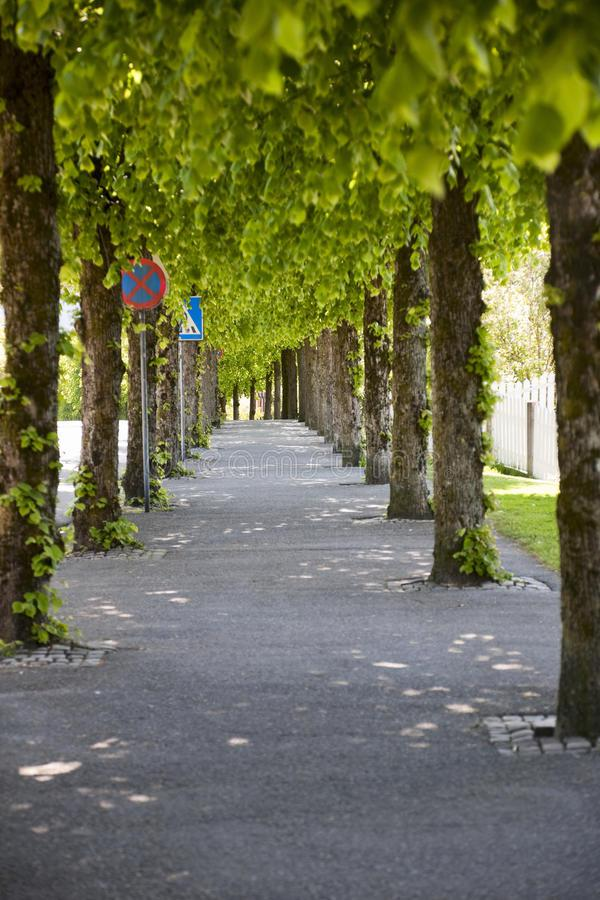

Before retrain: Pavement alley In the city stock image
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
211


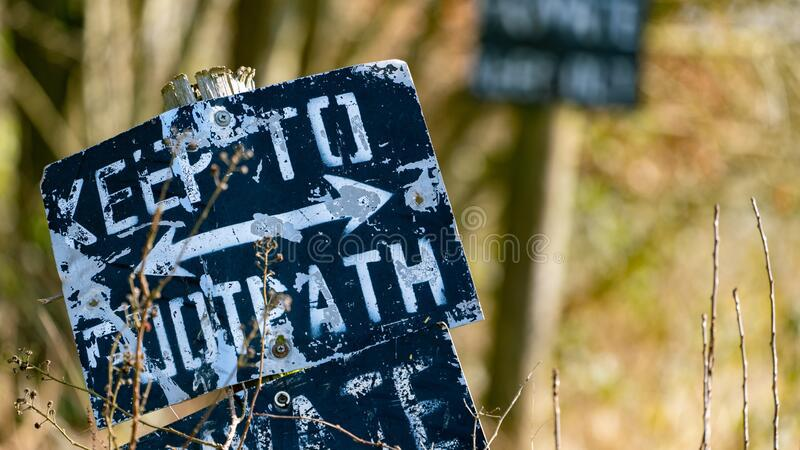

Before retrain: Stay to footpath signs on walking footpaths in the countryside In the UK stock photo
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
212


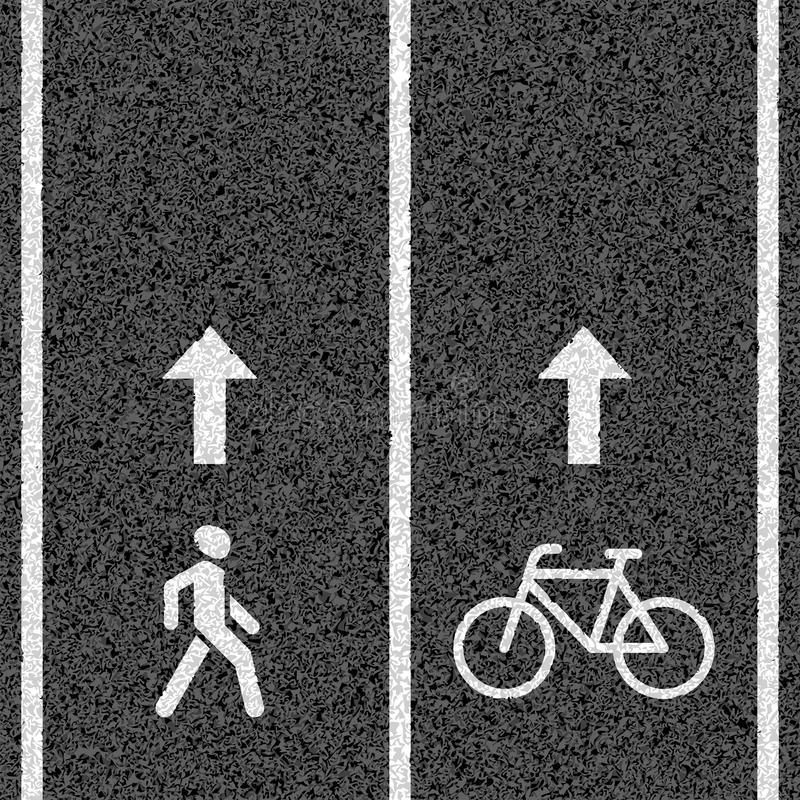

Before retrain: Bicycle and pedestrian paths Vector illustration stock illustration
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
213


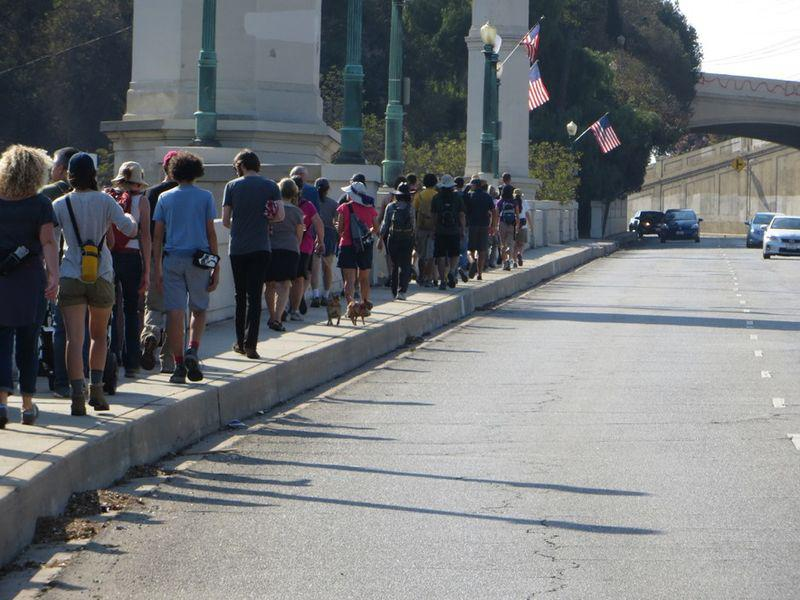

Before retrain: relates to In the Pedways of Los Angeles Past a Vision of a PedestrianFriendly Future
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
214


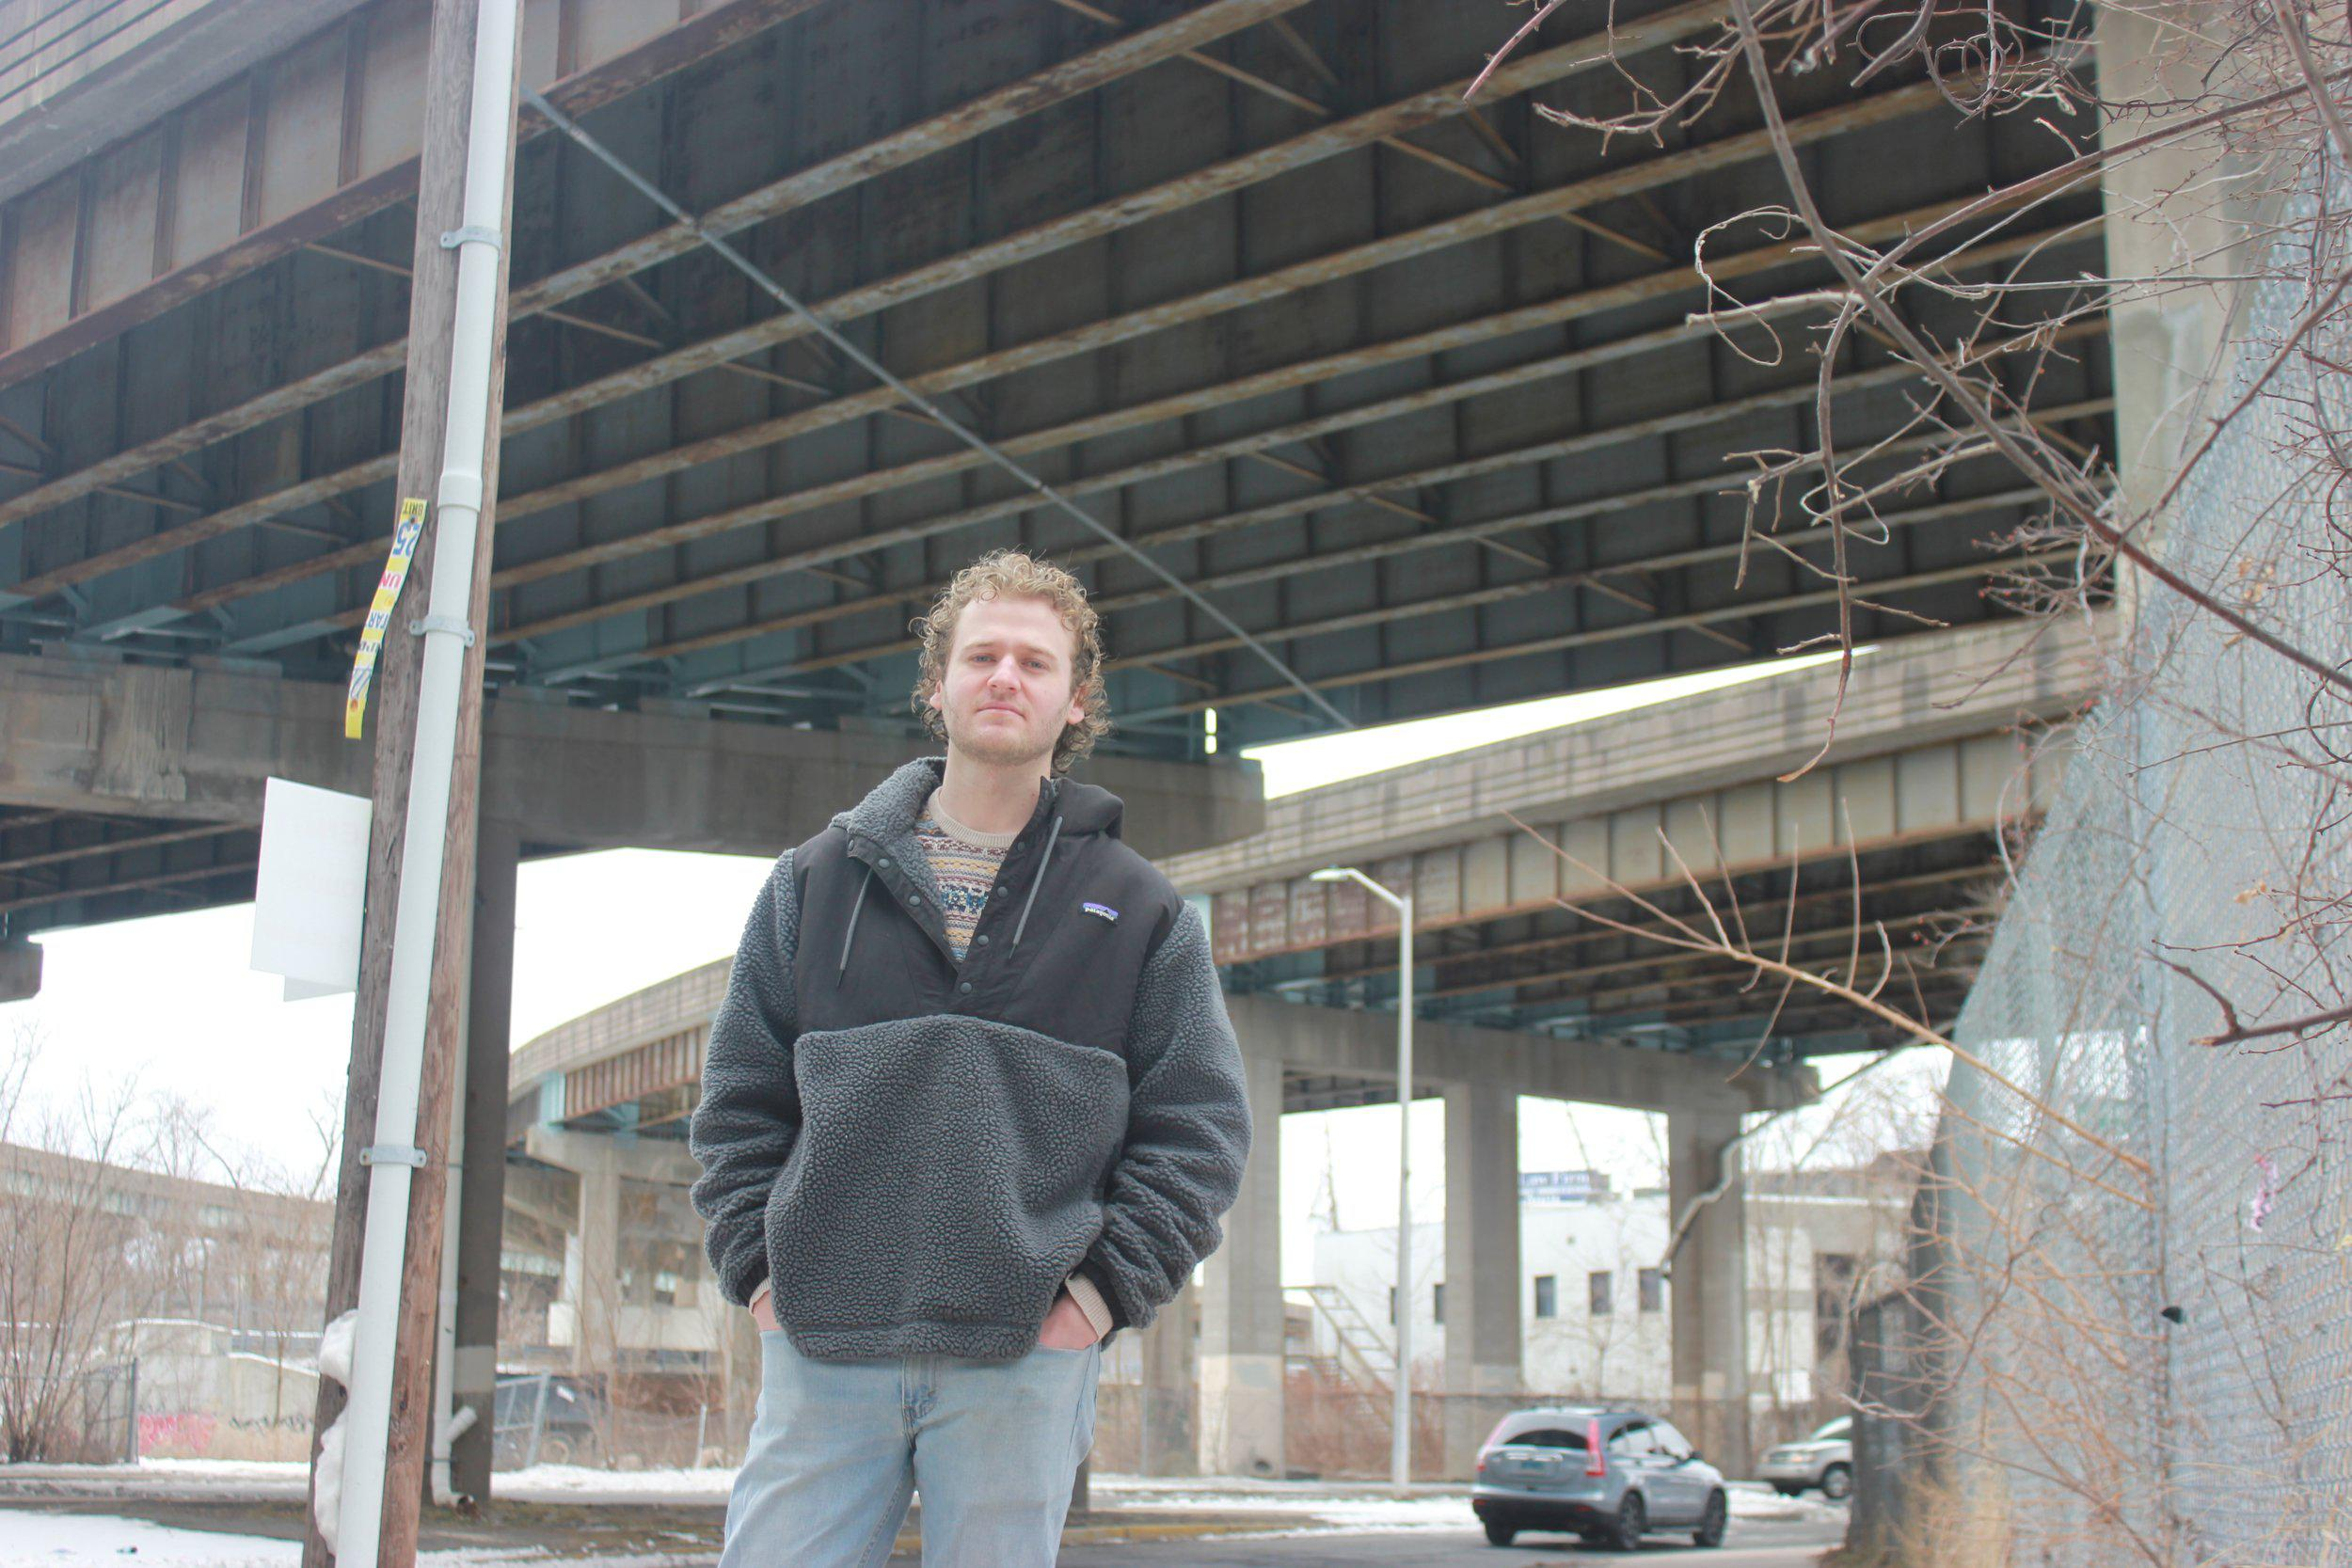

Before retrain: The Road That Killed a City
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
215


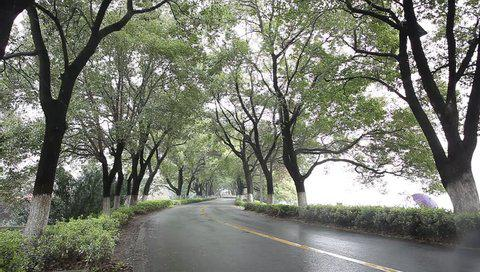

Before retrain: Country road with trees along
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
216


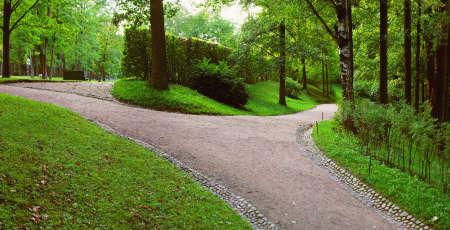

Before retrain: A wide alley in the park is divided into two paths diverging in different directions the paths among the grass are lined with stone gutters
query on dataset: {'boulevard', 'bridleways', 'bridleway', 'alley', 'path', 'footpath', 'pedestrian'}
217


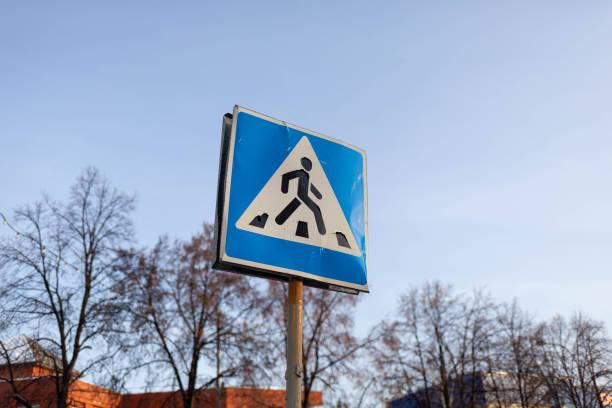

Before retrain: The road sign of a pedestrian crossing in the city at the intersection The road sign of a pedestrian crossing in the city at the intersection A worn sign on warns drivers about a pedestrian crossing Caution on the road zebra pedestrian crossing directional sign stock pictures royaltyfree photos  images
query on dataset: {'direction', 'cross', 'traffic', 'lane', 'marker', 'signage', 'sign', 'parking', 'pedestrian', 'road'}


In [46]:
s_ind = 210
e_ind = 218
for idx, row in df_before.iterrows():
    if idx >=s_ind and idx < e_ind:
        print(idx)
        bf, af = get_cap(idx)
        top_id = df_before.at[idx,'topic_id']
        display(IImage(filename='deer_decode.jpg', width = 300, height = 200))
        print(f'Before retrain: {bf}')
#         print(f"context: {df_before.at[idx,'context']}")
        print(f'query on dataset: {topics[top_id]}')        

In [78]:
d_path = '/raid/AISSEL/htest/datasets/ped_ftest'
# df_after = pd.read_pickle(f'{d_path}/df_test_ped.pk')
# df_after

In [76]:
df_after['tag'] = d

In [77]:
df_after

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics,tag
0,167,167,Car on rural road vector Stock Photo,68,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.376758,0.212455,a,"{'passenger': 0, 'wheel': 1, 'vehicle': 1, 'wa..."
1,184,184,Bus Only Lane Rendering Kuhio and Walina,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.392783,0.160691,a,"{'freight': 1, 'transportation': 1, 'traffic':..."
2,187,187,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a,"{'freight': 1, 'transportation': 1, 'traffic':..."
3,192,192,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a,"{'freight': 1, 'transportation': 1, 'traffic':..."
4,209,209,Pedestrian Connections Congestion Strategy,112,,/9j/7gAOQWRvYmUAZAAAAAAA/9sAQwAIBgYHBgUIBwcHCQ...,0.612697,0.493012,a,"{'freight': 1, 'transportation': 1, 'traffic':..."
...,...,...,...,...,...,...,...,...,...,...
645,1228,1228,Westown Commons picnic shelter front view,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.395052,0.217862,o,"{'scenic': 0, 'recreation': 1, 'wilderness': 0..."
646,1241,1241,Humboldt Alexander Von Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.415312,0.211162,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0..."
647,1259,1259,photo of trees and the fenceline at Mason Hill...,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.446961,0.234170,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0..."
648,1296,1296,Hogback Ridge Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.579372,0.235827,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0..."


In [80]:
df_after.to_pickle(f'{d_path}/test_prediction_trained_on_all.pk')

In [82]:
! ls /raid/AISSEL/htest/datasets/ped_ftest/all

caption_stage1_train_all_topics_ped.tsv  caption_val_all_topics_ped.tsv
caption_stage2_train_all_topics_ped.tsv  checkpoint1_best.pt
caption_test_all_topics_ped.tsv		 checkpoint2_best.pt
